## Classification demo including training

In [73]:
##Import libraries
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [74]:
## Initialising the CNN
classifier = Sequential()

In [75]:
## Convolution(64 feature detector of dimension 3 by 3), input shape 3 layer for color image)
classifier.add(Conv2D(64,(3,3),input_shape = (64,64,3), activation = 'relu'))
## MaxPooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))


## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))


In [76]:
## Flattening
classifier.add(Flatten())

In [77]:
## Fully connected ANN, Hidden ANN and output layer
classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 128, activation = 'relu'))


In [78]:
#output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [79]:
## Compliling
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [80]:
## data importing and transforming and scaling
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255, 
        shear_range=0.2, # image will be distorted (let say 100 images, it will do 100 with original, another 100 with shear)
        zoom_range=0.2, # each image slightly modify (zooms 20 percent in this case)
        horizontal_flip=True) # flipping the image in diffrent directions 

In [81]:
## Scaling test data
##no  data augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

In [82]:
## Importing training data
train_set = train_datagen.flow_from_directory('D:\\Term_3\\AI\\DAY_5\\2-keras-cnn-catdog\\dataset\\training_set',
                                               target_size=(64, 64),
                                               batch_size=6, # it takes 6 samples from dataset, like wise it cover all the data
                                                             # 
                                               class_mode='binary')

Found 98 images belonging to 2 classes.


In [83]:
train_set.class_indices

{'cats': 0, 'dogs': 1}

In [84]:
#which is cat which is dog?
label_map = (train_set.class_indices)
print(label_map)

{'cats': 0, 'dogs': 1}


In [85]:
## Importng test data
test_set = test_datagen.flow_from_directory('D:\\Term_3\\AI\DAY_5\\2-keras-cnn-catdog\\dataset\\test_set',
                                            target_size=(64, 64),
                                            batch_size=6,
                                            class_mode='binary')

Found 38 images belonging to 2 classes.


In [87]:
## fitting model to images
classifier.fit_generator(
        train_set,
        steps_per_epoch=50, # number of images it will take per epoch,(it is actually equalant to batch_size),
                            # if we leave it system will take some number
        epochs=35,
        validation_data=test_set, # it will show test accuracy ()
        validation_steps=38)

# Note: validation is checking the test accuracy.

Epoch 1/35
50/50 [==============================] - 5s 94ms/step - loss: 0.2343 - acc: 0.8966 - val_loss: 1.8428 - val_acc: 0.5769
Epoch 2/35
50/50 [==============================] - 5s 97ms/step - loss: 0.1828 - acc: 0.9267 - val_loss: 2.0438 - val_acc: 0.6154
Epoch 3/35
50/50 [==============================] - 5s 103ms/step - loss: 0.1767 - acc: 0.9434 - val_loss: 1.7087 - val_acc: 0.4510
Epoch 4/35
50/50 [==============================] - 5s 93ms/step - loss: 0.1933 - acc: 0.9334 - val_loss: 1.5304 - val_acc: 0.5192
Epoch 5/35
50/50 [==============================] - 5s 101ms/step - loss: 0.1140 - acc: 0.9533 - val_loss: 2.4843 - val_acc: 0.5245
Epoch 6/35
50/50 [==============================] - 5s 96ms/step - loss: 0.1297 - acc: 0.9566 - val_loss: 1.9722 - val_acc: 0.5625
Epoch 7/35
50/50 [==============================] - 5s 94ms/step - loss: 0.0442 - acc: 0.9900 - val_loss: 3.2227 - val_acc: 0.5196
Epoch 8/35
50/50 [==============================] - 5s 97ms/step - loss: 0.2228 -

In [21]:
! pip install pillow

In [64]:
## prediction of single new data
import numpy as np
from keras.preprocessing import image
test_image= image.load_img('D:\\Term_3\\AI\\DAY_5\\2-keras-cnn-catdog\\dataset\\single_prediction\\dog.jpg'
                           ,target_size =(64,64))


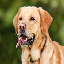

In [65]:
test_image

In [66]:
## Convert image to array
test_image = image.img_to_array(test_image)

In [67]:
## For single prediction change the dimension using axis. To remove problem of batch

test_image=test_image.reshape(1,64,64,3)

In [68]:
result = classifier.predict(test_image)
result

array([[1.]], dtype=float32)

In [69]:
## Class label of dog and cat

if result == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
    

In [70]:
prediction

'dog'

# saving weights

In [89]:
# serialize model to JSON

model_json = classifier.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
# serialize weights to disk
classifier.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
